**Author :** Clara Fronda, Laboratoire de Physique de l'Ecole Normale Supérieure (Paris, France).

**Email :** clara.fronda@phys.ens.fr

This script contains a simplified example of the temperature-nutrient growth relationship under the Kremer and Anderson parameterizations.

**Inputs :** ModelParameters.csv

**Outputs :** Figure 8

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from pylab import *

In [39]:
# Load parameters
# In all files, SQSU = Eppley, SQDU = Kremer, DQDU = Anderson
param = pd.read_csv('data/ModelParameters.csv')
param

,Model,Group,b,umax 20,a_PCmax,phenotype,K_N,umax 0
0,SQSU (Generic Q10),Coccolithophores,0.0382,1.8269,2.3819,c5,0.11375,0.8510
1,SQSU (Generic Q10),Dinoflagellates,0.0382,1.8269,3.0166,c24,0.27262,0.8510
2,SQSU (Generic Q10),Cyanobacteria,0.0382,1.8269,2.3446,c2,0.03065,0.8510
3,SQSU (Generic Q10),Diatoms,0.0382,1.8269,2.3819,c15,0.11375,0.8510
4,SQDU (Different µmax),Dinoflagellates,0.0575,0.8195,1.3532,c24,0.12229,0.2595
5,SQDU (Different µmax),Cyanobacteria,0.0575,0.9193,1.1798,c2,0.01543,0.2911
6,SQDU (Different µmax),Diatoms,0.0575,2.2122,2.8842,c15,0.13773,0.7005
7,SQDU (Different µmax),Coccolithophores,0.0575,1.6581,2.1618,c5,0.10324,0.5250
8,DQDU (Different Q10s),Coccolithophores,0.0353,1.4920,1.9558,c5,0.09340,0.7408
9,DQDU (Different Q10s),Dinoflagellates,0.0512,0.8057,1.3363,c24,0.12076,0.2905


In [40]:
param = np.array(param)

In [41]:
# Define possible values for temperature and nutrients
T = np.linspace(0,30,26)
N = np.linspace(0,0.5,26)

In [61]:
# Create growth as a function of parameters, T and N
def growth(A,Q10,Kn,T,N):
    return A*math.exp(Q10*(T))*(N/(N+Kn))

In [62]:
# Compute growth function for coccolithophores, SQDU
growth_SQDU_cocco = np.zeros((26,26))
for i in range(26):
  for j in range(26):
    growth_SQDU_cocco[i,j] = growth(param[7,7],param[7,2],param[7,6],T[j],N[i])

In [63]:
# Compute growth function for coccolithophores, DQDU
growth_DQDU_cocco = np.zeros((26,26))
for i in range(26):
  for j in range(26):
    growth_DQDU_cocco[i,j] = growth(param[8,7],param[8,2],param[8,6],T[j],N[i])

In [64]:
# Compute growth function for cyanobacteria, SQDU
growth_SQDU_cyano = np.zeros((26,26))
for i in range(26):
  for j in range(26):
    growth_SQDU_cyano[i,j] = growth(param[5,7],param[5,2],param[5,6],T[j],N[i])

In [65]:
# Compute growth function for cyanobacteria, DQDU
growth_DQDU_cyano = np.zeros((26,26))
for i in range(26):
  for j in range(26):
    growth_DQDU_cyano[i,j] = growth(param[10,7],param[10,2],param[10,6],T[j],N[i])

In [66]:
# Compute growth function for diatoms, SQDU
growth_SQDU_diatoms = np.zeros((26,26))
for i in range(26):
  for j in range(26):
    growth_SQDU_diatoms[i,j] = growth(param[6,7],param[6,2],param[6,6],T[j],N[i])

In [67]:
# Compute growth function for diatoms, DQDU
growth_DQDU_diatoms = np.zeros((26,26))
for i in range(26):
  for j in range(26):
    growth_DQDU_diatoms[i,j] = growth(param[11,7],param[11,2],param[11,6],T[j],N[i])

In [68]:
# Compute growth function for dinoflagellates, SQDU
growth_SQDU_dino = np.zeros((26,26))
for i in range(26):
  for j in range(26):
    growth_SQDU_dino[i,j] = growth(param[4,7],param[4,2],param[4,6],T[j],N[i])

In [69]:
# Compute growth function for dinoflagellates, DQDU
growth_DQDU_dino = np.zeros((26,26))
for i in range(26):
  for j in range(26):
    growth_DQDU_dino[i,j] = growth(param[9,7],param[9,2],param[9,6],T[j],N[i])

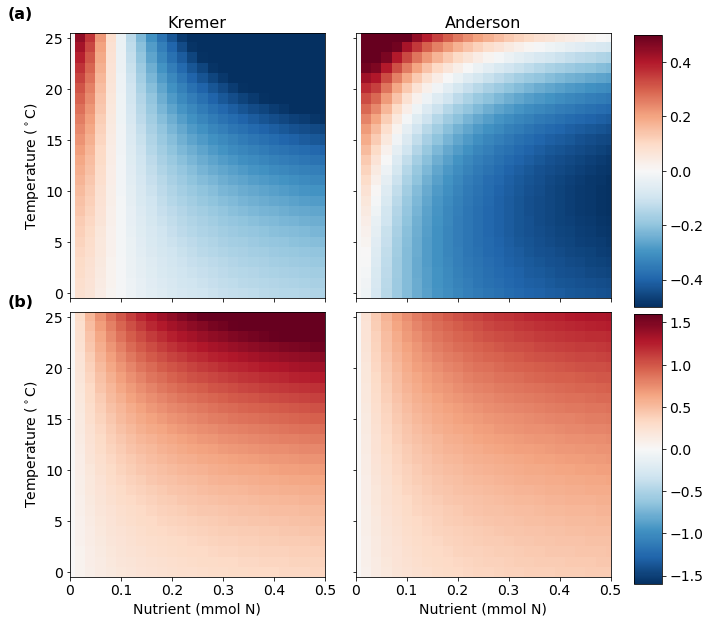

In [70]:
# Growth comparison for different phytoplankton groups
fig = plt.figure()
plt.rcParams["figure.figsize"] = [10, 10]

# Compute Cyanobacteria - Coccolithophores for SQ10
ax = fig.add_subplot(2, 2, 1)
ax.imshow((growth_SQDU_cyano-growth_SQDU_cocco).T, cmap=cm.RdBu_r, vmax=0.5, vmin=-0.5)
ax.invert_yaxis()
ax.set_xticklabels([])
ax.set_xlim(0,25)
plt.yticks(fontsize=14)
plt.ylabel('Temperature ($^\circ$C)',fontsize=14)
plt.title('Kremer',fontsize=16)

# Compute Cyanobacteria - Coccolithophores for DQ10
ax2 = fig.add_subplot(2, 2, 2)
im2 = ax2.imshow((growth_DQDU_cyano-growth_DQDU_cocco).T, cmap=cm.RdBu_r,vmax=0.5,vmin=-0.5)
ax2.invert_yaxis()
ax2.set_xticklabels([])
ax2.set_xlim(0,25)
ax2.set_yticklabels([])
plt.title('Anderson',fontsize=16)

cbar_ax = fig.add_axes([0.92, 0.5, 0.04, 0.378])
cbar_ax.tick_params(labelsize=14)
fig.colorbar(im2, cax=cbar_ax)

# Compute Diatoms - Dinoflagellates for SQ10
ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow((growth_SQDU_diatoms-growth_SQDU_dino).T,cmap=cm.RdBu_r,vmin=-1.6,vmax=1.6)
ax3.invert_yaxis()
x_label_list = ['0', '0.1', '0.2', '0.3', '0.4', '0.5']
ax3.set_xticks([0,5,10,15,20,25])
ax3.set_xticklabels(x_label_list)
ax3.set_xlim(0,25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Temperature ($^\circ$C)',fontsize=14)
plt.xlabel('Nutrient (mmol N)',fontsize=14)

# Compute Diatoms- Dinoflagellates for DQ10
ax4 = fig.add_subplot(2, 2, 4)
im4 = ax4.imshow((growth_DQDU_diatoms-growth_DQDU_dino).T,cmap=cm.RdBu_r,vmin=-1.6,vmax=1.6)
ax4.invert_yaxis()
ax4.set_yticklabels([])
x_label_list = ['0', '0.1', '0.2', '0.3', '0.4', '0.5']
ax4.set_xticks([0,5,10,15,20,25])
ax4.set_xticklabels(x_label_list)
ax4.set_xlim(0,25)
plt.xticks(fontsize=14)
plt.xlabel('Nutrient (mmol N)',fontsize=14)

# Adjust color bar position and spaces between subplots
cbar_ax2 = fig.add_axes([0.92, 0.115, 0.04, 0.375])
cbar_ax2.tick_params(labelsize=14)
fig.colorbar(im4, cax=cbar_ax2)
fig.subplots_adjust(wspace=0.05,
                    hspace=0.05)

# Plot and save figure
plt.plot()
plt.gcf().text(0.05,0.9, '(a)', fontsize=16, weight='bold')
plt.gcf().text(0.05,0.5, '(b)', fontsize=16, weight='bold')
plt.savefig('figures/Figure8.pdf',bbox_inches = 'tight')
